In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import warnings

warnings.filterwarnings('ignore')

sns.set()

%matplotlib inline

In [14]:
def standardize(df):
    ''' Returns an standardized copy of the dataframe.'''
    from pandas.api.types import is_numeric_dtype
    
    std_df = df.copy()
    
    for col in df.columns:
        if is_numeric_dtype(std_df[col]):
            std_df[col] = (std_df[col] - std_df[col].mean()) / std_df[col].std()
    
    return std_df

In [30]:
abalone = pd.read_csv('data/abalone.data', sep=',')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [31]:
abalone = pd.get_dummies(abalone, columns=['Sex'])
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


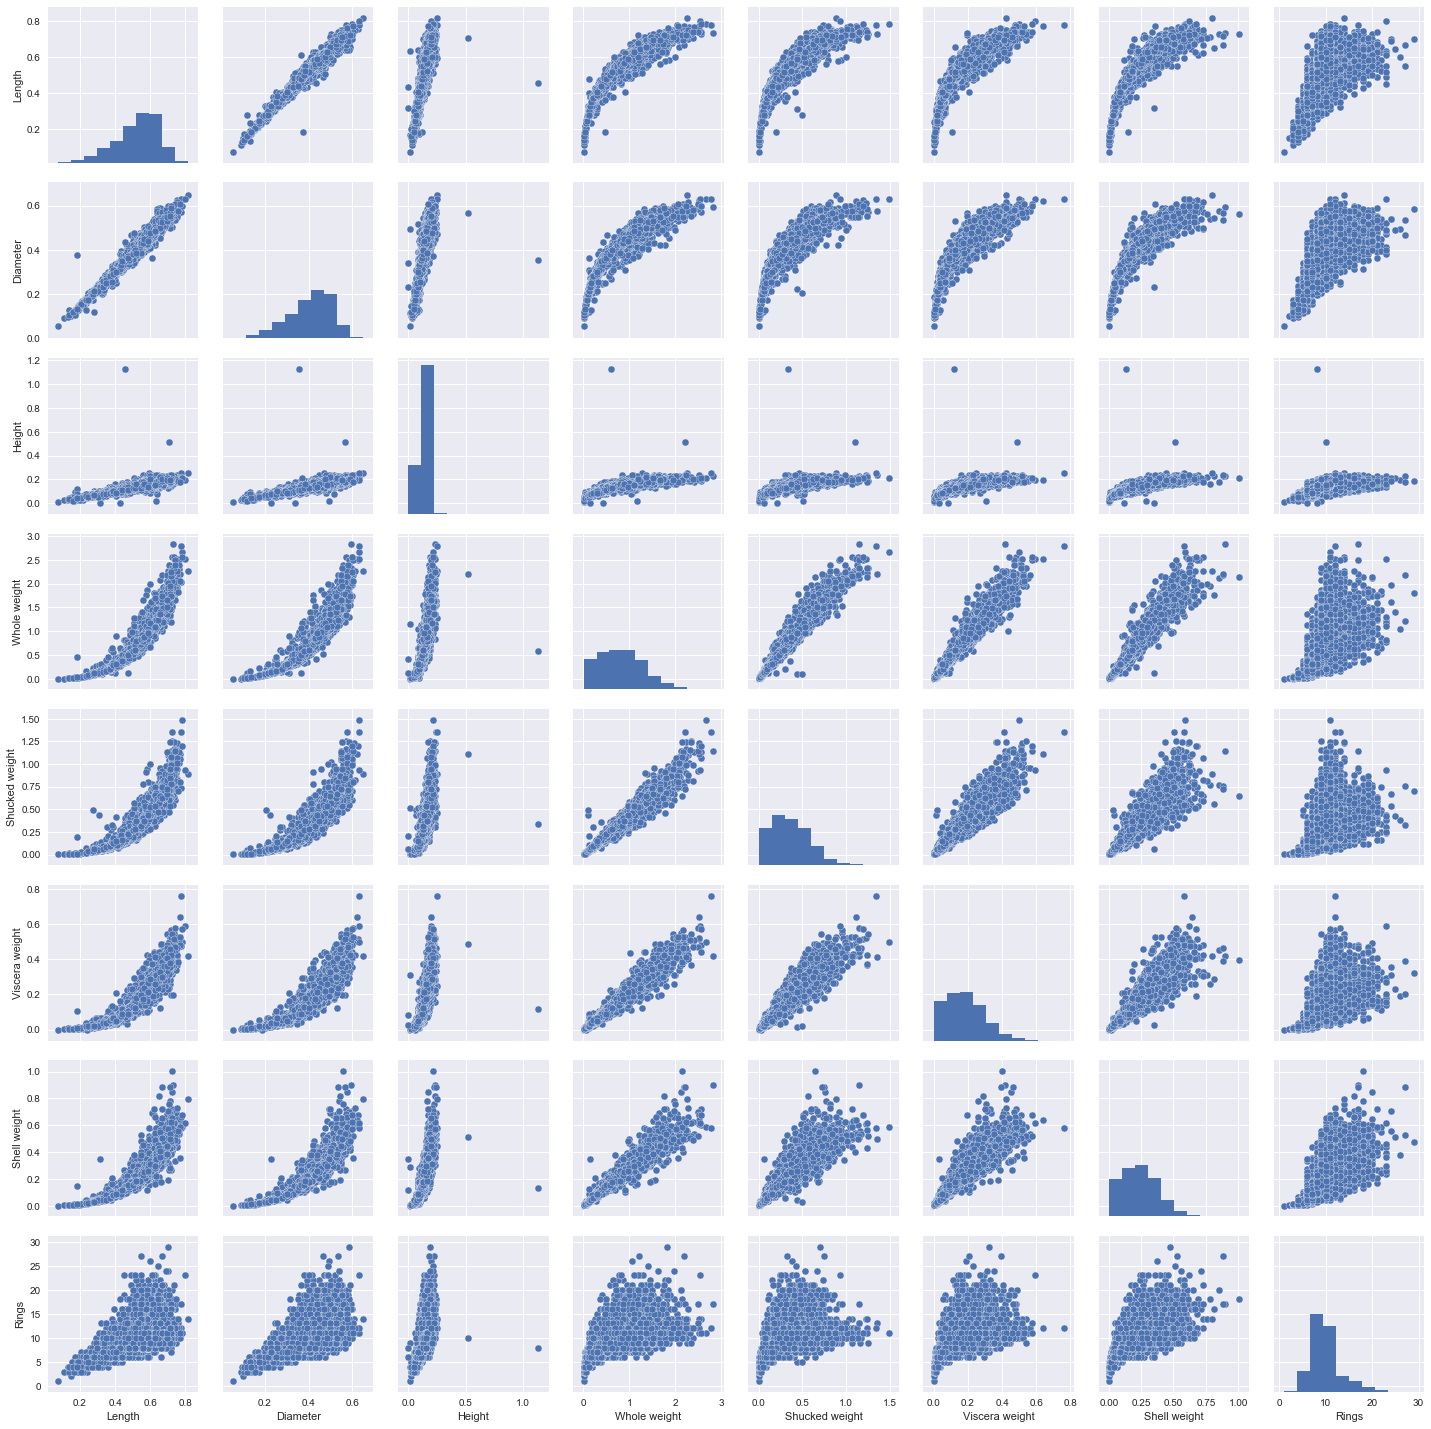

In [32]:
sns.pairplot(abalone.drop(columns=['Sex_F', 'Sex_I', 'Sex_M']))

In [33]:
y = abalone['Rings']
X = abalone.drop(columns=['Rings'])

In [34]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [35]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=123)

In [43]:
X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
2746,0.485,0.365,0.140,0.4475,0.1895,0.0925,0.2305,0,1,0
853,0.570,0.455,0.150,0.9520,0.3895,0.2155,0.2745,0,0,1
1809,0.640,0.475,0.140,1.0725,0.4895,0.2295,0.3100,1,0,0
3419,0.590,0.470,0.135,1.1685,0.5390,0.2790,0.2800,0,0,1
1199,0.720,0.580,0.195,2.1030,1.0265,0.4800,0.5375,1,0,0


In [45]:
lm = LinearRegression(fit_intercept=True, normalize=True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [57]:
print(lm.score(X_test, y_test))
print(mean_squared_error(lm.predict(X_test), y_test))

0.542959635862981
4.556079604408958


In [50]:
rm = Ridge(fit_intercept=True, normalize=True, alpha=0.5)
rm.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [59]:
print(rm.score(X_test, y_test))
print(mean_squared_error(rm.predict(X_test), y_test))

0.43467842942939006
5.635498042875323


In [53]:
lasm = Lasso(fit_intercept=True, normalize=True, alpha=0.5)
lasm.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
print(lasm.score(X_test, y_test))
print(mean_squared_error(lasm.predict(X_test), y_test))

-6.152596201203231e-05
9.969272473762608


In [61]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [62]:
print(gbr.score(X_test, y_test))
print(mean_squared_error(gbr.predict(X_test), y_test))

0.5336542490062866
4.64884183417169
